In [23]:
import cPickle as pickle
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import corner

In [25]:
def plot_simulation(measurements, alphas, betas, pop_alpha, pop_beta, burn_in=0.5, thin=0.1):
    alphas_good = alphas[int(burn_in * len(alphas))::int(1/thin)]
    betas_good = betas[int(burn_in * len(betas))::int(1/thin)]

    best_guess_alpha = np.median(alphas_good)
    best_guess_beta = np.median(betas_good)
    
    plt.hist(np.median(measurements, axis=1), normed=True, label="Data")
    plt.plot(np.linspace(0, 1, 100), stats.beta(best_guess_alpha, best_guess_beta).pdf(np.linspace(0, 1, 100)), label="Guess")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    alpha_beta_corner = np.vstack((alphas_good, betas_good)).T
    try:
        figure = corner.corner(alpha_beta_corner, quantiles=[0.16, 0.5, 0.84])
        ndim = 2
        # Extract the axes
        axes = np.array(figure.axes).reshape((ndim, ndim))

        value1 = np.asarray([pop_alpha, pop_beta])

        # Loop over the diagonal
        for i in range(ndim):
            ax = axes[i, i]
            ax.axvline(value1[i], color="g")

        # Loop over the histograms
        for yi in range(ndim):
            for xi in range(yi):
                ax = axes[yi, xi]
                ax.axvline(value1[xi], color="g")
                ax.axhline(value1[yi], color="g")
                ax.plot(value1[xi], value1[yi], "sg")
    except:
        print "Cannot corner plot"
    plt.show()

In [26]:
def get_results(pickle_file):
    return pickle.load(open(pickle_file, "rb"))

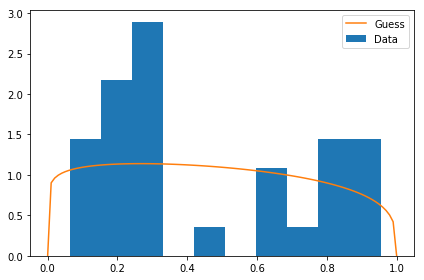

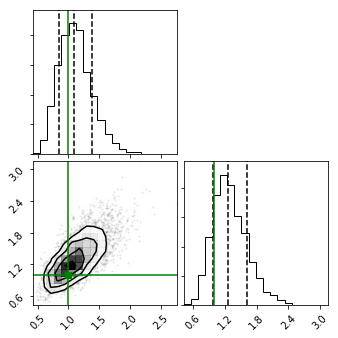

In [31]:
measurements, alphas, betas = get_results("tests/run_alpha_1.00_beta_1.00_0.pickle")
plot_simulation(measurements, alphas, betas, 1, 1)

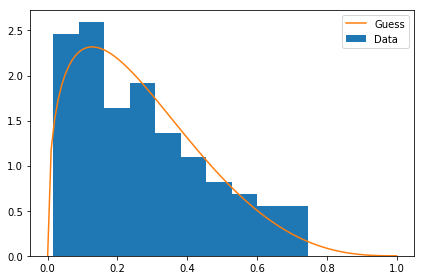

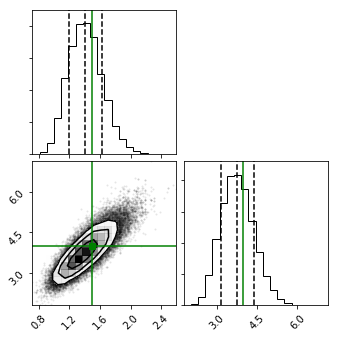

In [38]:
measurements, alphas, betas = get_results("tests/run_alpha_1.50_beta_4.00_samples_100_0.pickle")
plot_simulation(measurements, alphas, betas, 1.5, 4.0)

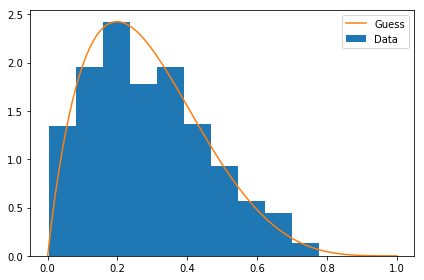

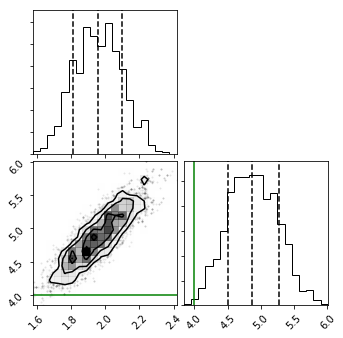

In [48]:
measurements, alphas, betas = get_results("tests/run_alpha_1.50_beta_4.00_samples_500_0.pickle")
plot_simulation(measurements, alphas, betas, 1.5, 4.0)

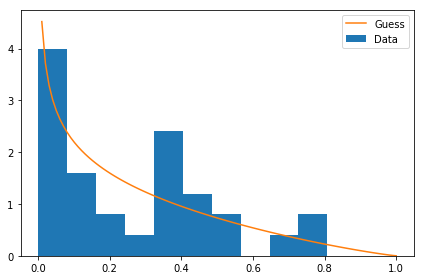

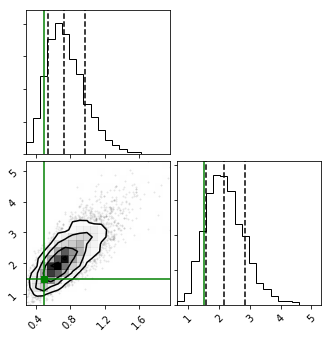

In [41]:
measurements, alphas, betas = get_results("tests/run_alpha_0.50_beta_1.50_iter_100000_samples_31_0.pickle")
plot_simulation(measurements, alphas, betas, 0.5, 1.5)

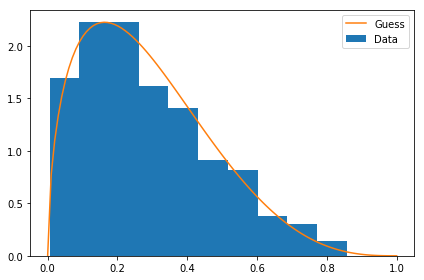

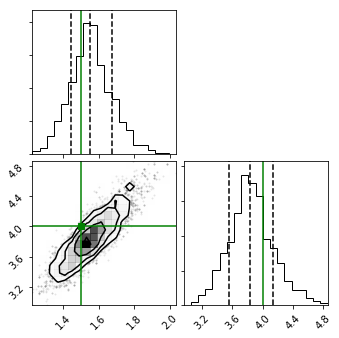

In [43]:
measurements, alphas, betas = get_results("tests/run_alpha_1.50_beta_4.00_iter_100000_samples_500_0.pickle")
plot_simulation(measurements, alphas, betas, 1.5, 4.0)

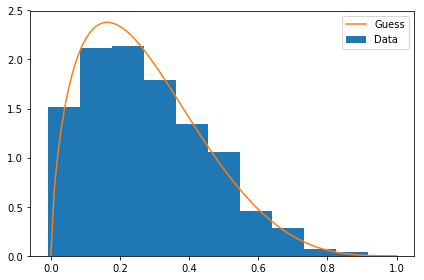

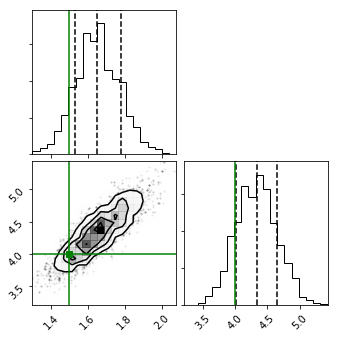

In [44]:
measurements, alphas, betas = get_results("tests/run_alpha_1.50_beta_4.00_iter_100000_samples_500_1.pickle")
plot_simulation(measurements, alphas, betas, 1.5, 4.0)

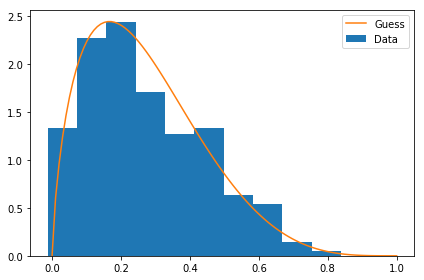

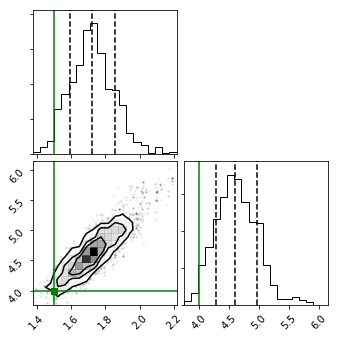

In [45]:
measurements, alphas, betas = get_results("tests/run_alpha_1.50_beta_4.00_iter_100000_samples_500_2.pickle")
plot_simulation(measurements, alphas, betas, 1.5, 4.0)

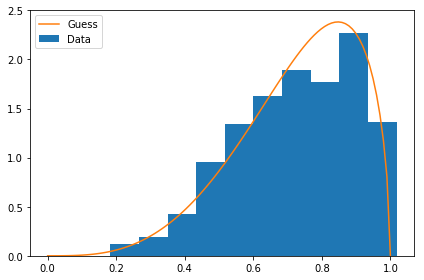

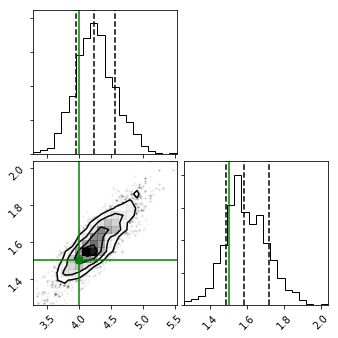

In [47]:
measurements, alphas, betas = get_results("tests/run_alpha_4.00_beta_1.50_iter_100000_samples_500_0.pickle")
plot_simulation(measurements, alphas, betas, 4.0, 1.5)